<a href="https://colab.research.google.com/github/edco29/MLBankMarketing/blob/Version-1.1/Bank_Marketing_Guillermo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
# sns.set(style="white")
# sns.set(style="whitegrid", color_codes=True)

# **DATASET**

---



In [0]:
#data =pd.read_csv('bank.csv', delimiter=";")
data =pd.read_csv('bank-full.csv', delimiter=";")

In [72]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [57]:
data.shape

(4521, 17)

# **EXPLORACIÓN DE DATOS**

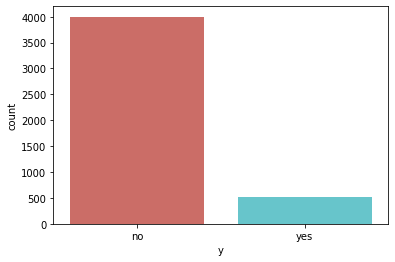

<Figure size 432x288 with 0 Axes>

In [73]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [67]:
data.isnull().sum().sort_values(ascending=False)

y            0
loan         0
job          0
marital      0
education    0
default      0
balance      0
housing      0
contact      0
poutcome     0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
age          0
dtype: int64

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


# **CREACIÓN DE VARIABLES**

In [0]:
data["y"]= data["y"].map( {'yes': 1, 'no': 0} ).astype(int)

In [0]:
var_categoricas=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in var_categoricas:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data_at = data.join(cat_list)
    data = data_at

In [121]:
data.shape

(45211, 61)

In [155]:
columnas_total = data.columns.values.tolist()
columnas_usar = [col for col in columnas_total if col not in var_categoricas]
print(columnas_usar)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [156]:
data_usar = data[columnas_usar]
data_usar.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [157]:
data_usar.shape

(45211, 52)

In [0]:
y=['y']
X=[i for i in columnas_usar if i not in y]

# **REGRESORES DE IMPORTANCIA**

In [0]:
from sklearn.feature_selection import RFE

logreg = LogisticRegression(solver='liblinear')

In [160]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(data_usar[X], data_usar[y] )

print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False False False False
  True False False  True False False False False False False False False
 False False False False False  True False  True  True False  True False
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True]
[30 31 27 29 14 32 26 24 17  9  4 23  1 20 19  1 22  5 12 15  2 25  3  7
 21  8 10  6 18  1 28  1  1 11  1 16  1  1  1  1  1 13  1  1  1  1  1  1
  1  1  1]


In [161]:
col_validas = rfe.support_
col_validas = list(col_validas)
cols = list(columnas_usar)
print(cols,col_validas)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown'] [False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, Fals

In [162]:
from itertools import compress

final_colum = list(compress(cols, col_validas))
final_colum

['job_management',
 'job_services',
 'housing_no',
 'loan_no',
 'loan_yes',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success']

In [0]:
x=data_usar[final_colum]
y=data_usar['y']

# **VISUALIZACIÓN DE DATOS RELACIONADOS**

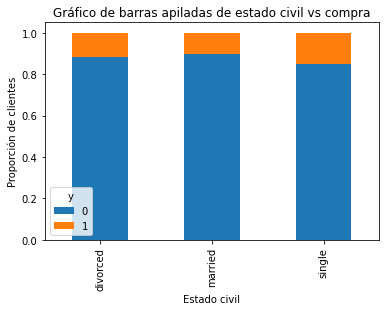

In [169]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Gráfico de barras apiladas de estado civil vs compra')
plt.xlabel('Estado civil')
plt.ylabel('Proporción de clientes')
plt.savefig('mariral_vs_pur_stack')

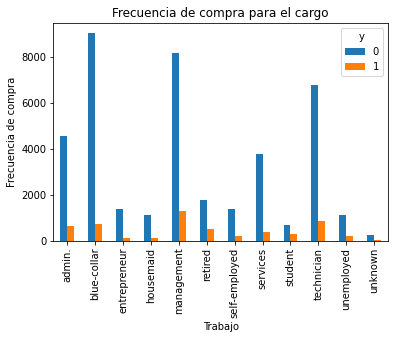

In [170]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Frecuencia de compra para el cargo')
plt.xlabel('Trabajo')
plt.ylabel('Frecuencia de compra')
plt.savefig('purchase_fre_job')

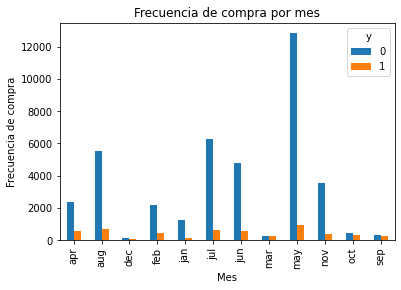

In [171]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Frecuencia de compra por mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia de compra')
plt.savefig('pur_fre_month_bar')

# **IMPLEMENTACIÓN DEL MODELO DE REGRESIÓN LOGÍSTICA**

In [172]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)

In [174]:
print('Precisión del clasificador de regresión logística en el conjunto de prueba: {:.3f}'.format(logreg.score(X_test, y_test)))

Precisión del clasificador de regresión logística en el conjunto de prueba: 0.892


# **CROSS VALIDATION**

In [175]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("Precisión promedio de validación cruzada 10 veces: %.3f" % (results.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Precisión promedio de validación cruzada 10 veces: 0.894


# **MATRIZ DE CONFUSIÓN**

In [177]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[11824   145]
 [ 1318   277]]
